## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('drive/MyDrive/AI_ML Course/AAC Course Assignments/Assignment-10/task_d.csv')

In [4]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [6]:
data.corr(method='spearman')

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.279215,0.815543,1.000000,-0.279215,0.994639,0.554162,0.750583
y,-0.279215,1.000000,-0.510861,-0.279215,1.000000,-0.337037,-0.438569,-0.737998
z,0.815543,-0.510861,1.000000,0.815543,-0.510861,0.856275,0.631669,0.868640
x*x,1.000000,-0.279215,0.815543,1.000000,-0.279215,0.994639,0.554162,0.750583
2*y,-0.279215,1.000000,-0.510861,-0.279215,1.000000,-0.337037,-0.438569,-0.737998
2*z+3*x*x,0.994639,-0.337037,0.856275,0.994639,-0.337037,1.000000,0.586431,0.798917
w,0.554162,-0.438569,0.631669,0.554162,-0.438569,0.586431,1.000000,0.629805
target,0.750583,-0.737998,0.868640,0.750583,-0.737998,0.798917,0.629805,1.000000


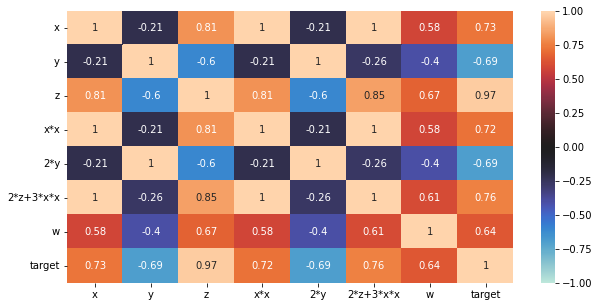

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,center=0,vmin=-1,vmax=1)
plt.show()

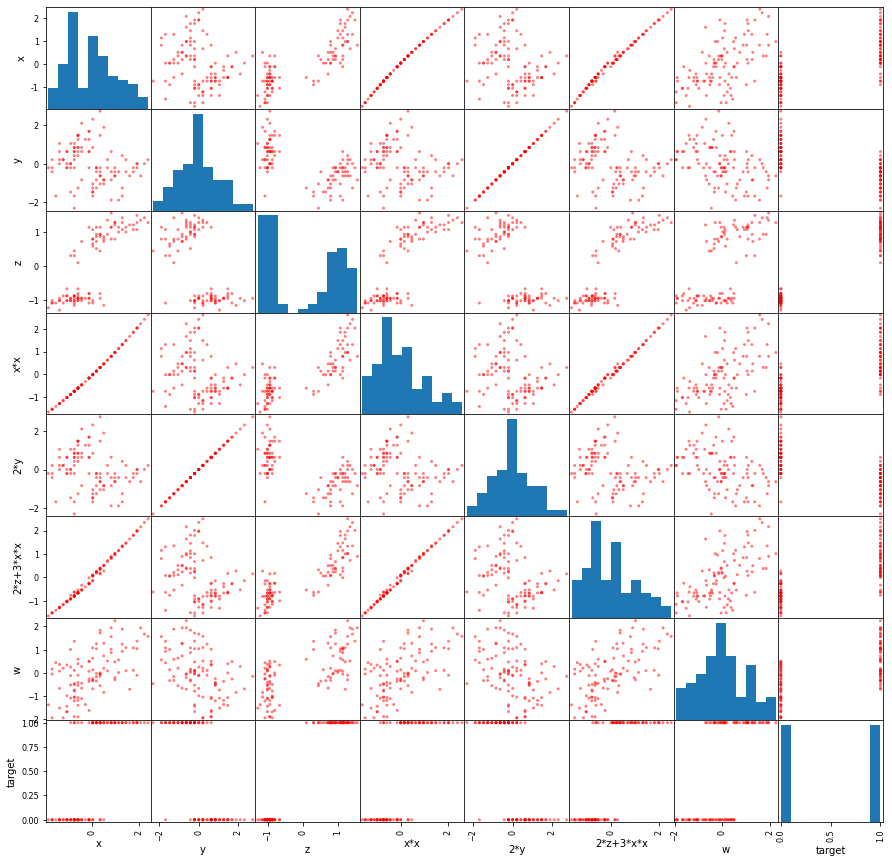

In [8]:
pd.plotting.scatter_matrix(data,figsize=(15,15),color='r',marker='.')
plt.show()

In [9]:
#find the best alpha for logistic regression
from sklearn.model_selection import RandomizedSearchCV
parameters = {'C':[1, 10, 20, 50]}
param={'alpha':list(random.sample(range(0, 110), 30))}
model_clf = SGDClassifier(loss="log",random_state = 10)
clf = RandomizedSearchCV(estimator=model_clf,param_distributions=param,n_jobs=-1,return_train_score=True,scoring='roc_auc')
clf.fit(X, Y)
print(clf.best_params_)
print("best score",clf.best_score_)

{'alpha': 56}
best score 1.0


In [10]:
#create a model called best_model
from sklearn.metrics import accuracy_score
best_model = SGDClassifier(loss="log",alpha=0.0001)
best_model.fit(X,Y)
y_pred = best_model.predict(X)
best_model_accuracy = accuracy_score(Y,y_pred)
best_model_coef = best_model.coef_
print("best_model_accuracy",best_model_accuracy)
print("best_model_coef",best_model_coef)

best_model_accuracy 1.0
best_model_coef [[  7.57862344 -11.25467337  20.4863023    6.25268293 -11.25467337
    8.10082824   9.4417768 ]]


In [11]:
#modifying original data
X_new = X + 0.01
best_model.fit(X_new,Y)
y_pred = best_model.predict(X_new)
best_model_accuracy_edited = accuracy_score(Y,y_pred)
best_model_coef_edited = best_model.coef_

print("best_model_accuracy_edited",best_model_accuracy_edited)
print("best_model_coef_edited",best_model_coef_edited)

best_model_accuracy_edited 1.0
best_model_coef_edited [[  7.66213483 -10.53806528  22.19455041   6.21887883 -10.53806528
    8.27553753   7.17498136]]


In [12]:
print("percentage change in weights")
(best_model_coef_edited - best_model_coef)*100/best_model_coef

percentage change in weights


array([[  1.10193352,  -6.3672046 ,   8.33848923,  -0.54063346,
         -6.3672046 ,   2.15668435, -24.0081447 ]])

In [13]:
print("Original Accuracy = {}".format(best_model_accuracy))
print("Edited Accuracy = {}".format(best_model_accuracy_edited))
print("-"*80)
print("Original weight W =")
print(best_model_coef)
print("Edited weight W =")
print(best_model_coef_edited)
print("-"*80)
print("Deviations in Accuracy and Weight:")
print("Accuracy deviation = {}".format(best_model_accuracy-best_model_accuracy_edited))
print("W (weight) deviation:")
weight_deviation = np.abs(best_model_coef - best_model_coef_edited)
print(weight_deviation)
print("-"*80)
print("Top 4 features which have higher % change in weights compare to the other features:")
columns = list(data.columns)
for index in np.argsort(-weight_deviation).reshape(-1)[:4]:
    print(columns[index])

Original Accuracy = 1.0
Edited Accuracy = 1.0
--------------------------------------------------------------------------------
Original weight W =
[[  7.57862344 -11.25467337  20.4863023    6.25268293 -11.25467337
    8.10082824   9.4417768 ]]
Edited weight W =
[[  7.66213483 -10.53806528  22.19455041   6.21887883 -10.53806528
    8.27553753   7.17498136]]
--------------------------------------------------------------------------------
Deviations in Accuracy and Weight:
Accuracy deviation = 0.0
W (weight) deviation:
[[0.08351139 0.71660808 1.70824811 0.0338041  0.71660808 0.1747093
  2.26679544]]
--------------------------------------------------------------------------------
Top 4 features which have higher % change in weights compare to the other features:
w
z
y
2*y


**Task2**


In [14]:
linear_SVM = SGDClassifier(loss="hinge",random_state = 10)
param = {"alpha" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
svm_clf = GridSearchCV(linear_SVM, param, cv=5)
svm_clf.fit(X, Y)
svm_clf.best_params_

{'alpha': 1e-05}

In [15]:
#create a model called best_model
best_model_SVM = SGDClassifier(loss="log",alpha=0.00001)
best_model_SVM.fit(X,Y)
y_pred = best_model_SVM.predict(X)
best_model_accuracy_SVM = accuracy_score(Y,y_pred)
best_model_coef_SVM = best_model_SVM.coef_

In [16]:
#modifying original data
X_new = X + 0.01
best_model_SVM.fit(X_new,Y)
y_pred = best_model_SVM.predict(X_new)
best_model_accuracy_edited_SVM = accuracy_score(Y,y_pred)
best_model_coef_edited_SVM = best_model_SVM.coef_


In [17]:
#compare result
print("Linear SVM")
print("Original Accuracy = {}".format(best_model_accuracy_SVM))
print("Edited Accuracy = {}".format(best_model_accuracy_edited_SVM))
print("-"*80)
print("Original weight W =")
print(best_model_coef_SVM)
print("Edited weight W =")
print(best_model_coef_edited_SVM)
print("-"*80)
print("Deviations in Accuracy and Weight:")
print("Accuracy deviation = {}".format(best_model_accuracy_SVM - best_model_accuracy_edited_SVM))
print("W (weight) deviation:")
weight_deviation = np.abs(best_model_coef_SVM - best_model_coef_edited_SVM)
print(weight_deviation)
print("-"*80)
print("Top 4 features which have higher % change in weights compare to the other features:")
columns = list(data.columns)
for index in np.argsort(-weight_deviation).reshape(-1)[:4]:
    print(columns[index])

Linear SVM
Original Accuracy = 1.0
Edited Accuracy = 1.0
--------------------------------------------------------------------------------
Original weight W =
[[ 4.10294714 -8.07223718  9.35887671  4.19773784 -8.07223718  4.9079204
   2.82539619]]
Edited weight W =
[[ 11.65332573 -16.83405106  20.6854837   10.54002753 -16.83405106
   11.98334174  10.04183148]]
--------------------------------------------------------------------------------
Deviations in Accuracy and Weight:
Accuracy deviation = 0.0
W (weight) deviation:
[[ 7.55037859  8.76181388 11.32660698  6.34228969  8.76181388  7.07542134
   7.21643529]]
--------------------------------------------------------------------------------
Top 4 features which have higher % change in weights compare to the other features:
z
y
2*y
x


Observation

1.Based on the above results, we can see that the weight changes drastically before and after noise is added to the data. This indicates that there is multicollinearity in the data. It is important to note that multicollinearity does not affect models accuracy (as shown above)

2.As we can see the correlation matrix given features had Multicollinearity,due to that one feature change leads to another feature due to intercorrelation. so for every new iteration feature importance changes if noise added to the data.
